In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential,load_model,Model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [2]:
path = "data/UTKFace"

In [3]:
pixels = []
age = []
gender = []
for img in os.listdir(path):
  ages = img.split("_")[0]
  genders = img.split("_")[1]
  img = cv2.imread(str(path)+"/"+str(img))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  pixels.append(np.array(img))
  age.append(np.array(ages))
  gender.append(np.array(genders))

In [4]:
age = np.array(age,dtype=np.int64)
pixels = np.array(pixels)
gender = np.array(gender,np.uint64)

In [5]:
x_train,x_test,y_train,y_test = train_test_split(pixels,age,random_state=100, test_size=0.2, shuffle=True)
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(pixels,gender,random_state=100, test_size=0.2, shuffle=True)

In [6]:
input = Input(shape=(200,200,3))
conv1 = Conv2D(140,(3,3),activation="relu")(input)
conv2 = Conv2D(130,(3,3),activation="relu")(conv1)
batch1 = BatchNormalization()(conv2)
pool3 = MaxPool2D((2,2))(batch1)
conv3 = Conv2D(120,(3,3),activation="relu")(pool3)
batch2 = BatchNormalization()(conv3)
pool4 = MaxPool2D((2,2))(batch2)
flt = Flatten()(pool4)
#age
age_l = Dense(128,activation="relu")(flt)
age_l = Dense(64,activation="relu")(age_l)
age_l = Dense(32,activation="relu")(age_l)
age_l = Dense(1,activation="relu")(age_l)
#gender
gender_l = Dense(128,activation="relu")(flt)
gender_l = Dense(80,activation="relu")(gender_l)
gender_l = Dense(64,activation="relu")(gender_l)
gender_l = Dense(32,activation="relu")(gender_l)
gender_l = Dropout(0.5)(gender_l)
gender_l = Dense(2,activation="softmax")(gender_l)


In [7]:
fle_s = 'model/AgeGenderModel.h5'
checkpoint = ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop = tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights=True)
callback_list=[checkpoint,Early_stop]

In [8]:
model = Model(inputs=input,outputs=[age_l,gender_l])
model.compile(optimizer="adam",loss=["mse","sparse_categorical_crossentropy"],metrics=['mae','accuracy'])

In [9]:
History = model.fit(x_train,[y_train,y_train_2],validation_data=(x_test,[y_test,y_test_2]),epochs=15, callbacks=callback_list)

Epoch 1/15
593/593 [==============================] - ETA: 0s - loss: 330.1174 - dense_3_loss: 328.9267 - dense_8_loss: 1.1907 - dense_3_mae: 13.2298 - dense_3_accuracy: 0.0204 - dense_8_mae: 0.5000 - dense_8_accuracy: 0.6447
Epoch 00001: val_loss improved from inf to 562.58514, saving model to model\AgeGenderModel.h5
593/593 [==============================] - 331s 558ms/step - loss: 330.1174 - dense_3_loss: 328.9267 - dense_8_loss: 1.1907 - dense_3_mae: 13.2298 - dense_3_accuracy: 0.0204 - dense_8_mae: 0.5000 - dense_8_accuracy: 0.6447 - val_loss: 562.5851 - val_dense_3_loss: 561.9858 - val_dense_8_loss: 0.5994 - val_dense_3_mae: 19.7339 - val_dense_3_accuracy: 0.0517 - val_dense_8_mae: 0.5000 - val_dense_8_accuracy: 0.6913
Epoch 2/15
593/593 [==============================] - ETA: 0s - loss: 150.6718 - dense_3_loss: 150.2868 - dense_8_loss: 0.3850 - dense_3_mae: 9.0130 - dense_3_accuracy: 0.0071 - dense_8_mae: 0.5000 - dense_8_accuracy: 0.8267
Epoch 00002: val_loss improved from 562.

In [10]:
model.save("model/AgeGenderModel.h5")

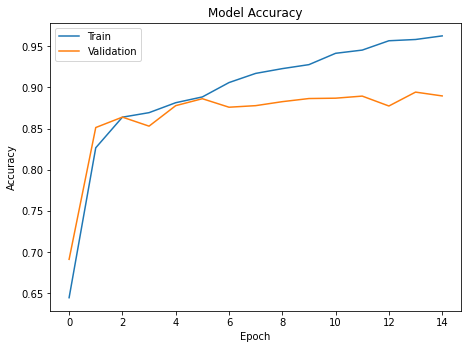

In [11]:
plt.plot(History.history['dense_8_accuracy'])
plt.plot(History.history['val_dense_8_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

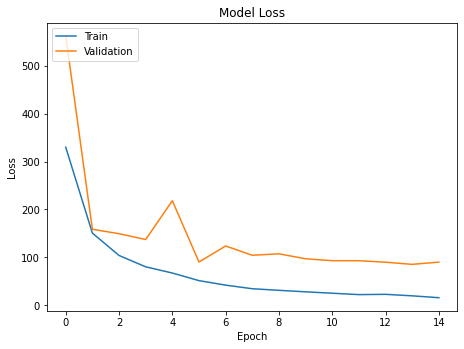

In [12]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)